# Praca Domowa 1

Zbiór danych: https://archive.ics.uci.edu/ml/datasets/Student+Performance. Dane te przedstawiają wyniki uczniów z matematyki oraz języka portugalskiego z dwóch różnych szkół, oraz dane o tych uczniach.

Hipotezy to zbadania:


*   Uczniowie z większą ilością nieobecności mają gorsze oceny
*   Im wyższa edukacja rodziców tym wyższe oceny dzieci
*   Osoby płci żeńskiej mają średnio wyższe oceny od płci męskiej
*   Uczniowie jednej z dwóch szkół mają średnio wyższe wyniki od uczniów z drugiej szkoły
*   Związek romantyczny ucznia ma negatywny wpływ na jego/jej oceny


## Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_math = pd.read_csv('student-mat.csv', sep = ';')
df_port = pd.read_csv(/student-por.csv', sep = ';')
df_math["student_index"] = df_math.index
df_port["student_index"] = df_port.index

In [3]:
df_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,student_index
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,2
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,3
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,4


In [4]:
df_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,student_index
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,197.000000
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,114.170924
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,98.500000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,197.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,295.500000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,394.000000


In [5]:
df_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   school         395 non-null    object
 1   sex            395 non-null    object
 2   age            395 non-null    int64 
 3   address        395 non-null    object
 4   famsize        395 non-null    object
 5   Pstatus        395 non-null    object
 6   Medu           395 non-null    int64 
 7   Fedu           395 non-null    int64 
 8   Mjob           395 non-null    object
 9   Fjob           395 non-null    object
 10  reason         395 non-null    object
 11  guardian       395 non-null    object
 12  traveltime     395 non-null    int64 
 13  studytime      395 non-null    int64 
 14  failures       395 non-null    int64 
 15  schoolsup      395 non-null    object
 16  famsup         395 non-null    object
 17  paid           395 non-null    object
 18  activities     395 non-null   

In [6]:
df_math_long = pd.wide_to_long(df_math, stubnames="G", i = "student_index", j="grade_period")
df_math_long = df_math_long.reset_index()
df_math_long["grade_period"] = "G" + df_math_long["grade_period"].astype(str)
df_port_long = pd.wide_to_long(df_port, stubnames="G", i = "student_index", j="grade_period")
df_port_long = df_port_long.reset_index()
df_port_long["grade_period"] = "G" + df_port_long["grade_period"].astype(str)

## Uczniowie z większą ilością nieobecności mają gorsze oceny

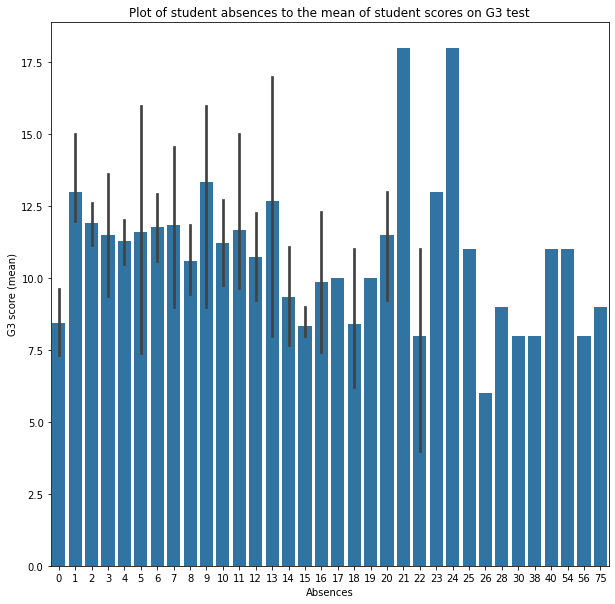

In [7]:
plt.figure(figsize=(10,10))
sns.barplot(y = "G3", x = "absences", data = df_math, estimator = np.mean, color = "tab:blue")
plt.title("Plot of student absences to the mean of student scores on G3 test")
plt.xlabel("Absences")
plt.ylabel("G3 score (mean)")
plt.show()

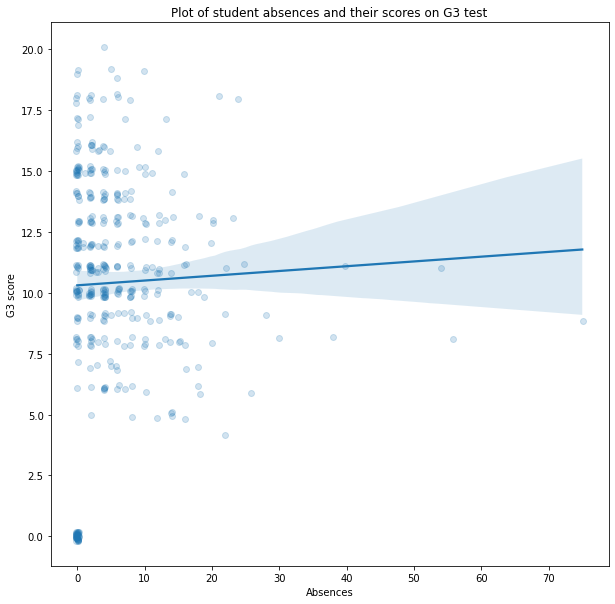

In [8]:
plt.figure(figsize=(10,10))
sns.regplot(data=df_math, y="G3", x="absences", y_jitter=0.2, x_jitter=0.2, scatter_kws={'alpha':0.2})
plt.title("Plot of student absences and their scores on G3 test")
plt.xlabel("Absences")
plt.ylabel("G3 score")
plt.show()

Z pierwszego wykresu może wydawać się nam że faktycznie z większą ilością nieobecności wiążą się gorsze wyniki. Jednak rzadko występujące ilości nieobecności wciąż z wysokimi wynikami na teście G3 zaburzają wykres (przykładowo tylko pojedyncze osoby miały 21 lub 24 nieobecności). Drugi wykres przedstawia nam że na tej ilości danych nie jesteśmy w stanie stwierdzić czy faktycznie zachodzi ta korelacja. (Na tych danych wychodzi wręcz odwrotnie, tzn. wraz z wzrostem ilości nieobecności wzrasta wynik na teście.)

## Im wyższa edukacja rodziców tym wyższe oceny dzieci

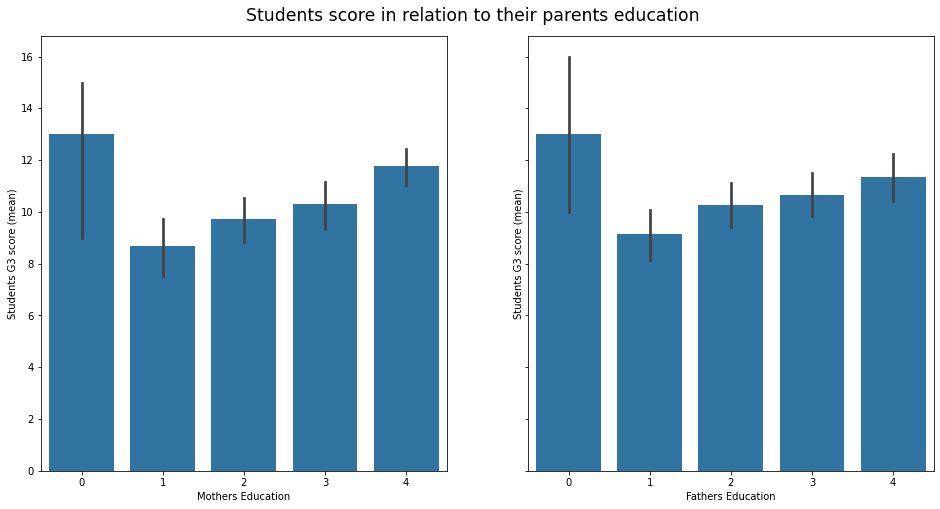

In [9]:
test = "G3"
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(16, 8))
sns.barplot(y = test, x = "Medu", data = df_math, estimator = np.mean, ax = ax1, color = "tab:blue")
plt.suptitle("Students score in relation to their parents education", fontsize='xx-large', y = 0.93)
ax1.set_xlabel("Mothers Education")
ax1.set_ylabel("Students G3 score (mean)")
sns.barplot(y = test, x = "Fedu", data = df_math, estimator = np.mean, ax = ax2, color = "tab:blue")
ax2.set_xlabel("Fathers Education")
ax2.set_ylabel("Students G3 score (mean)")
plt.show()

Należy zauważyć że dla edukacji oznaczonej jako "0", jest bardzo mało uczniów (2-3 uczniów), więc nie jest to reprezentatywna grupa. Reszta grup, o wiele większej ilości danych, sugerują że faktycznie zachodzi ta zależność.

## Osoby płci żeńskiej mają średnio wyższe oceny od płci męskiej

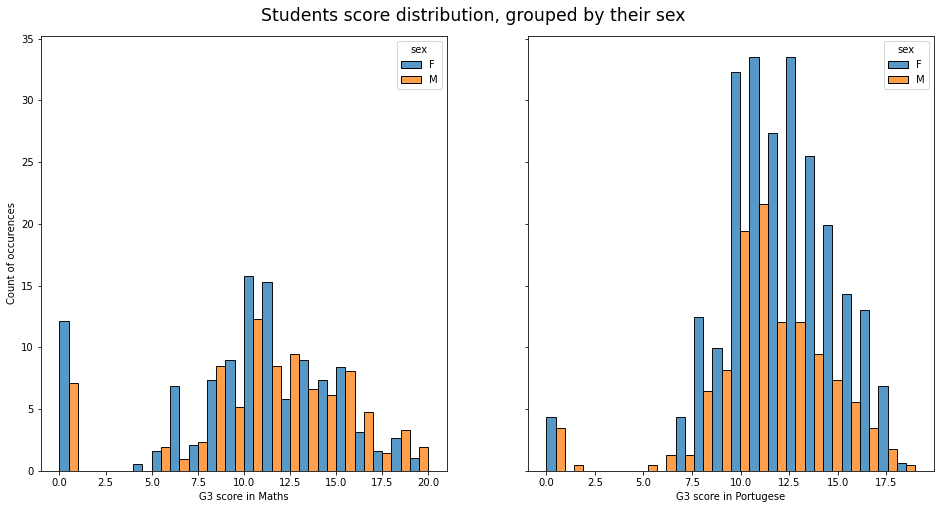

In [10]:
stat = "frequency"
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 8))
sns.histplot(df_math, x="G3", bins = 20, hue="sex", multiple="dodge", stat = stat, ax = ax1)
sns.histplot(df_port, x="G3", bins = 20, hue="sex", multiple="dodge", stat = stat, ax = ax2)
plt.suptitle("Students score distribution, grouped by their sex", fontsize='xx-large', y = 0.93)
ax1.set_xlabel("G3 score in Maths")
ax1.set_ylabel("Count of occurences")
ax2.set_xlabel("G3 score in Portugese")
ax2.set_ylabel("")
plt.show()

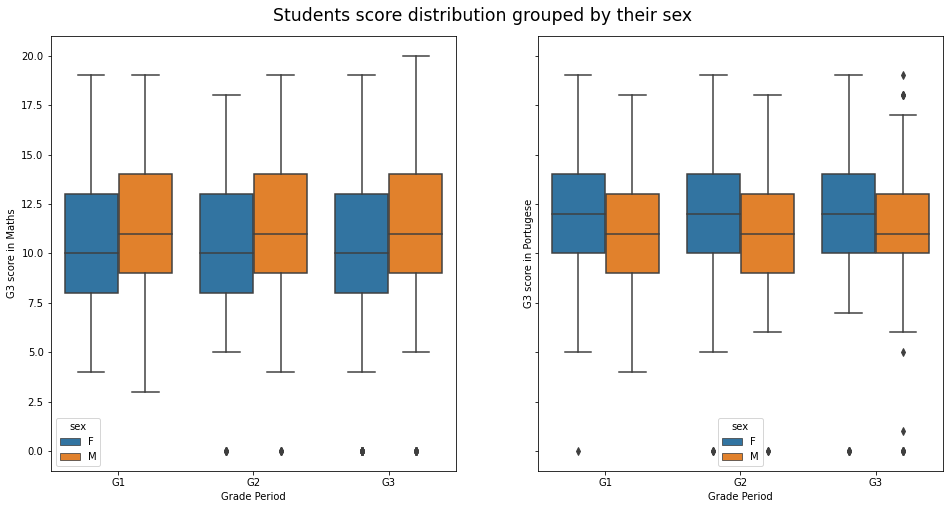

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 8))
sns.boxplot(x="grade_period", y="G", hue="sex", data=df_math_long, ax=ax1)
sns.boxplot(x="grade_period", y="G", hue="sex", data=df_port_long, ax=ax2)
plt.suptitle("Students score distribution grouped by their sex", fontsize='xx-large', y = 0.93)
ax1.set_xlabel("Grade Period")
ax1.set_ylabel("G3 score in Maths")
ax2.set_xlabel("Grade Period")
ax2.set_ylabel("G3 score in Portugese")
plt.show()

Faktycznie jest różnica między wynikami osób różnych płci, jednak między przedmiotami inaczej wyglądają te zależności. W matematyce osoby płci męskiej osiągnęły lepsze wyniki, a w języku portugalskim lepiej wypadły osoby płci żeńskiej. Do wykonania tych wykresów została stworzona ramka danych będąca odpowiednikiem naszych danych, jest w postaci "długiej" ramki. Zostało to zastosowane tylko do umożliwienia wykonania tych boxplotów (zazwyczaj jest to bardziej intuicyjny format danych do wykonywania wykresów).

## Uczniowie jednej z dwóch szkół mają średnio wyższe wyniki od uczniów z drugiej szkoły

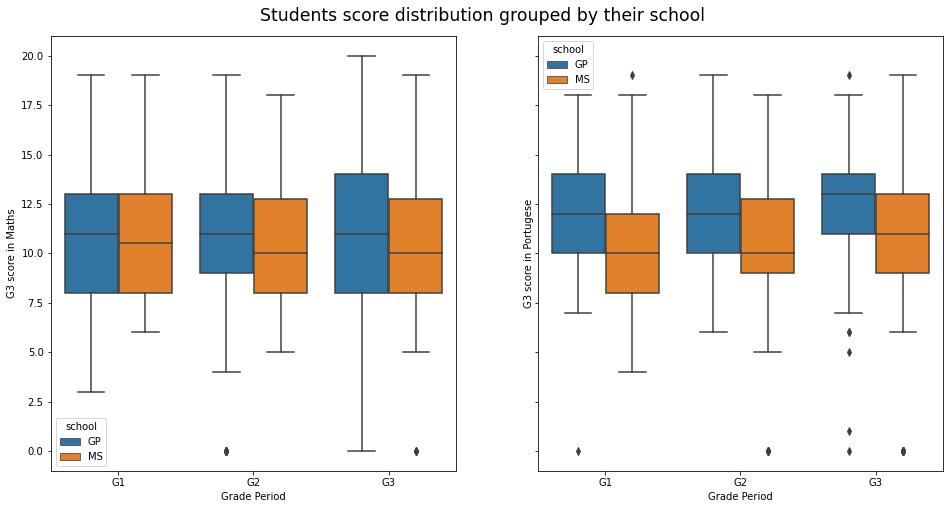

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 8))
sns.boxplot(x="grade_period", y="G", hue="school", data=df_math_long, ax=ax1)
sns.boxplot(x="grade_period", y="G", hue="school", data=df_port_long, ax=ax2)
plt.suptitle("Students score distribution grouped by their school", fontsize='xx-large', y = 0.93)
ax1.set_xlabel("Grade Period")
ax1.set_ylabel("G3 score in Maths")
ax2.set_xlabel("Grade Period")
ax2.set_ylabel("G3 score in Portugese")
plt.show()

Szkoła "Gabriel Pereira" okazała się w obu przedmiotach otrzymywać lepsze wyniki i do tego w każdej z ocen. Jest to o wiele lepiej widoczne w przypadku języka portugalskiego.

## Związek romantyczny ucznia ma negatywny wpływ na jego/jej oceny.

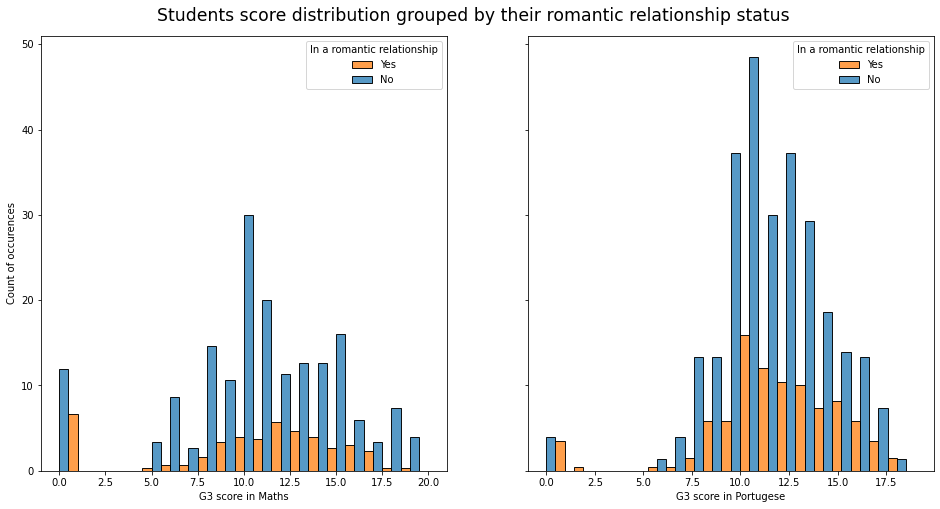

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 8))
sns.histplot(df_math, x="G3", bins = 20, hue="romantic", multiple="dodge", stat = "frequency", ax = ax1)
sns.histplot(df_port, x="G3", bins = 20, hue="romantic", multiple="dodge", stat = "frequency", ax = ax2)
plt.suptitle("Students score distribution grouped by their romantic relationship status", fontsize='xx-large', y = 0.93)
ax1.set_xlabel("G3 score in Maths")
ax1.set_ylabel("Count of occurences")
ax1.legend(['Yes', 'No'] ,title="In a romantic relationship")
ax2.set_xlabel("G3 score in Portugese")
ax2.legend(['Yes', 'No'] ,title="In a romantic relationship")
plt.show()

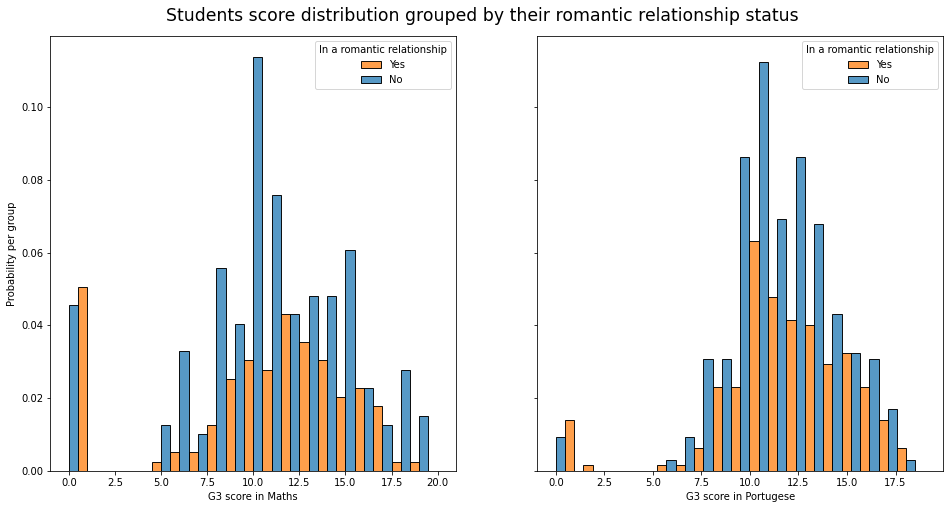

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 8))
sns.histplot(df_math, x="G3", bins = 20, hue="romantic", multiple="dodge", stat = "probability", ax = ax1)
sns.histplot(df_port, x="G3", bins = 20, hue="romantic", multiple="dodge", stat = "probability", ax = ax2)
plt.suptitle("Students score distribution grouped by their romantic relationship status", fontsize='xx-large', y = 0.93)
ax1.set_xlabel("G3 score in Maths")
ax1.set_ylabel("Probability per group")
ax1.legend(['Yes', 'No'] ,title="In a romantic relationship")
ax2.set_xlabel("G3 score in Portugese")
ax2.legend(['Yes', 'No'] ,title="In a romantic relationship")
plt.show()

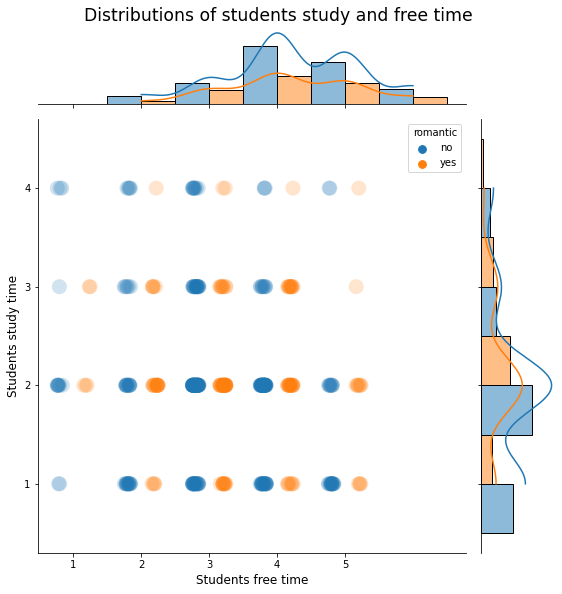

In [15]:
g = sns.JointGrid(y="studytime", x="freetime", data=df_math, hue="romantic", height = 8)
g.plot_joint(sns.stripplot, jitter=1.0, dodge=True, alpha=.2, size = 15)
g.plot_marginals(sns.histplot, multiple="dodge", discrete=True, kde=True)
g.set_axis_labels("Students free time", "Students study time", fontsize=12)
plt.yticks(ticks=[1,2,3,4])
plt.suptitle("Distributions of students study and free time", y=1.02, fontsize='xx-large')
plt.show()

Związek romantyczny ucznia z pewnością wpływ na naukę, czas na nią poświęcany jak i czas wolny. Z tego zbioru danych wynikałoby że jest to efekt negatywny, czyli hipoteza dla tych szkół jest prawdziwa. Pierwszy z histogramów wskazuje na znaczny różnice między tymi dwoma grupami, jednak przedstawione jest tam zliczenie ile razy występuje dany przypadek. Liczba osób poza związkami jest znacznie większa niż tych w, więc do lepszego porównania tych grup służy drugi histogram, przedstawiający prawdopodobieństwo że student z danej grupy otrzyma dany wynik. To wyliczenie bierze pod uwagę wielkość grup.